In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "Train.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

In [3]:
# Display basic info and first few rows
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2451 non-null   object 
 1   Product_Brand  2451 non-null   object 
 2   Item_Category  2451 non-null   object 
 3   Subcategory_1  2451 non-null   object 
 4   Subcategory_2  2451 non-null   object 
 5   Item_Rating    2451 non-null   float64
 6   Date           2451 non-null   object 
 7   Selling_Price  2451 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 153.3+ KB

First 5 Rows:
  Product Product_Brand             Item_Category     Subcategory_1  \
0  P-2610         B-659        bags wallets belts              bags   
1  P-2453        B-3078                  clothing  women s clothing   
2  P-6802        B-1810  home decor festive needs        showpieces   
3  P-4452        B-3078  beauty and personal care          eye care   
4  P-8

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Item_Rating  Selling_Price
count  2451.000000    2451.000000
mean      3.078335    2447.947776
std       1.187362    6734.982434
min       1.000000      33.000000
25%       2.000000     371.000000
50%       3.100000     596.000000
75%       4.100000    1194.500000
max       5.000000   70784.000000


In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


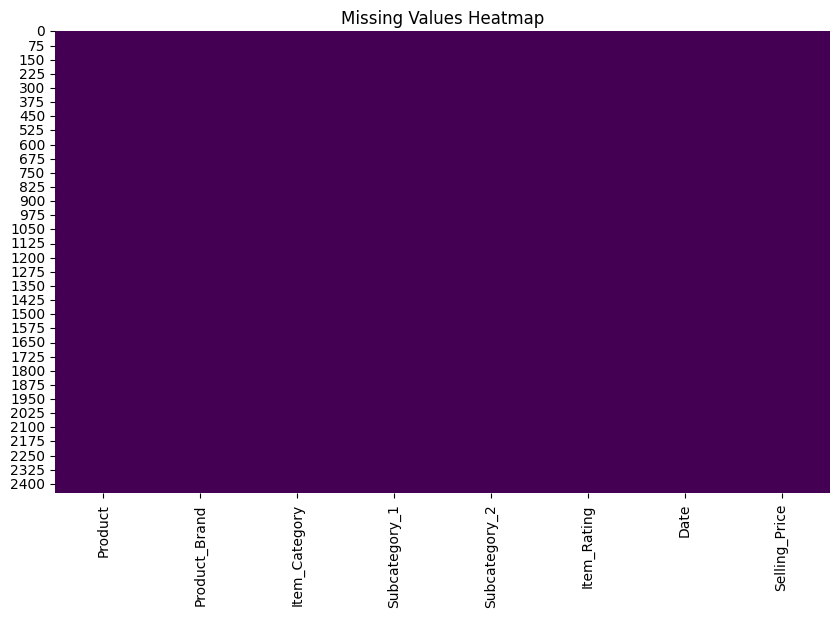

In [7]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [1]:
# Distribution of target variable (Price)
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

NameError: name 'plt' is not defined

In [9]:
# Boxplot for detecting outliers in Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Price")
plt.show()

KeyError: 'Price'

<Figure size 800x500 with 0 Axes>

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Pairplot for numerical features
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

In [ ]:
# Convert date column to datetime if exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

In [ ]:
 # Line plot of price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Price', color='red')
plt.title("Price Variation Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()    

In [ ]:
# Price range per month
df['Month'] = df.index.month
df['Year'] = df.index.year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Price', data=df)
plt.title("Monthly Price Variation")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

In [ ]:
# Distribution of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
to_plot = categorical_cols[:3] if len(categorical_cols) > 3 else categorical_cols  # Limit to 3 for clarity
for col in to_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()